# Recommendations with IBM

In this notebook, we are using recommendation skills on a real data from the IBM Watson Studio platform. 


By following the table of contents, we will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

In [309]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle
import operator

# display all content in columns and rows
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

%matplotlib inline

# read in data
df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [310]:
# Show df_content to get an idea of the data
df_content.head()

doc_body  \
0  Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch Queue Queue __count__/__total__ Find out why CloseDEMO: DETECT MALFUNCTIONING IOT SENSORS WITH STREAMING ANALYTICS\r\nIBM AnalyticsLoading...\r\n\r\nUnsubscribe from IBM Analytics? Cancel UnsubscribeWorking...\r\n\r\nSubscribe Subscribed Unsubscribe 26KLoading...\r\n\r\nLoading...\r\n\r\nWorking...\r\n\r\nAdd toWANT TO WATCH THIS AGAIN LATER?\r\nSign in to add this video to a playlist. Sign in Share More * ReportNEED TO REPORT THE VIDEO?\r\n   Sign in to report inappropriate content. Sign in\r\n * Transcript\r\n * Statistics\r\n * Add translations\r\n\r\n175 views 6LIKE THIS VIDEO?\r\nSign in to make your opinion count. Sign in 7 0DON'T LIKE THIS VIDEO?\r\nSign in to make your opinion count. Sign in 1Loading...\r\n\r\nLoading...\r\n\r\nTRANSCRIPT\r\nThe interactive transcript could not be loaded.Loading...\r\n\r\nLoading...\r\n\r\nRating is available when the video has been rented. This feature is not available right now. Please try again later. Published on Nov 6, 2017This video demonstrates a Streaming Analytics application written in Python\r\nrunning in the IBM Data Science experience. The results of the analysis are\r\ndisplayed on a map using Plotly.\r\n\r\nThe notebook demonstrated in this video is available for you to try: http://ibm.biz/WeatherNotebook\r\n\r\nVisit Streamsdev for more articles and tips about Streams: https://developer.ibm.com/streamsdev\r\n\r\nPython API Developer guide: http://ibmstreams.github.io/streamsx....\r\n\r\nStreaming Analytics in Python course: https://developer.ibm.com/courses/all...\r\n\r\n * CATEGORY\r\n    * Science & Technology\r\n   \r\n   \r\n * LICENSE\r\n    * Standard YouTube License\r\n   \r\n   \r\n\r\nShow more Show lessLoading...\r\n\r\nAutoplay When autoplay is enabled, a suggested video will automatically play next.UP NEXT\r\n * The Python ecosystem for Data Science: A guided tour - Christian Staudt -\r\n   Duration: 25:41. PyData 1,411 views 25:41\r\n\r\n\r\n--------------------------------------------------------------------------------\r\n\r\n * IBM Streaming Analytics and Python - Duration: 1:00:51. John O'Neill 105\r\n   views 1:00:51\r\n * How Customers Are Using the IBM Data Science Experience Expected Cases and\r\n   Not So Expected Ones - Duration: 18:29. Databricks 327 views 18:29\r\n * Giovanni Lanzani | Applied Data Science - Duration: 35:14. PyData 2,728 views 35:14\r\n * Detecting Fraud in Real-Time with Azure Stream Analytics - Duration: 32:16.\r\n   Philip Howard 71 views 32:16\r\n * Step by step guide how to build a real-time anomaly detection system using\r\n   Apache Spark Streaming - Duration: 16:11. Mariusz Jacyno 4,591 views 16:11\r\n * Real-time Analytics with Azure Stream Analytics - Duration: 54:47. PASS\r\n   Business Analytics Virtual Group 940 views 54:47\r\n * Real-Time Machine Learning Analytics Using Structured Streaming and Kinesis\r\n   Firehose - Duration: 31:25. Databricks 660 views 31:25\r\n * Data Science - Duration: 25:05. manish telang 3 views 25:05\r\n * Real-Time Log Analytics using Amazon Kinesis and Amazon Elasticsearch Service\r\n   - Duration: 28:32. Amazon Web Services - Webinar Channel 1,072 views 28:32\r\n * IBM Data Science Experience and Machine Learning Use Cases in Healthcare -\r\n   Duration: 26:53. IDEAS 157 views 26:53\r\n * Streaming Analytics Comparison of Open Source Frameworks, Products, Cloud\r\n   Services - Duration: 47:06. Kai Wähner 1,761 views 47:06\r\n * An overview of IBM Streaming Analytics for Bluemix - Duration: 44:12. IBM\r\n   Analytics 1,311 views 44:12\r\n * Predicting Stock Prices - Learn Python for Data Science #4 - Duration: 7:39.\r\n   Siraj Raval 274,452 views 7:39\r\n * REST API concepts and examples - Duration: 8:53. WebConcepts 1,687,034 

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
article_id    45993 non-null float64
title         45993 non-null object
email         45976 non-null object
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [312]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 5 columns):
doc_body           1042 non-null object
doc_description    1053 non-null object
doc_full_name      1056 non-null object
doc_status         1056 non-null object
article_id         1056 non-null int64
dtypes: int64(1), object(4)
memory usage: 41.3+ KB


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [313]:
# Create copy of dataframes
df_copy = df.copy()
df_content_copy = df_content.copy()

In [314]:
# Remove null emails
# df_copy =  df_copy[pd.notnull(df_copy['email'])]

In [315]:
# Descriptive
user_article = df_copy.groupby('email')['article_id'].count().sort_values(ascending=False)
user_article.describe()

count    5148.000000
mean     8.930847   
std      16.802267  
min      1.000000   
25%      1.000000   
50%      3.000000   
75%      9.000000   
max      364.000000 
Name: article_id, dtype: float64

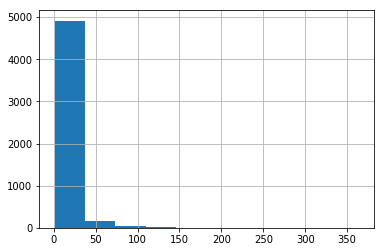

In [316]:
# Visual
df_copy.groupby('email')['article_id'].count().sort_values(ascending=False).hist();

In [317]:
df_copy.describe()

,article_id
count,45993.000000
mean,908.846477
std,486.647866
min,0.000000
25%,460.000000
50%,1151.000000
75%,1336.000000
max,1444.000000


In [318]:
# Fill in the median and maximum number of user_article interactios below
median_val = 3 # 50% of individuals interact with ____ number of articles or fewer.
max_views_by_user = 364 # The maximum number of user-article interactions by any 1 user is ______.

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [319]:
# Find and explore duplicate articles
sum(df_content_copy['article_id'].duplicated())

5

In [320]:
# Remove any rows that have the same article_id - only keep the first
df_content_copy = df_content_copy.drop_duplicates(subset=['article_id'], keep='first')

In [321]:
# Validate
sum(df_content_copy['article_id'].duplicated())

0

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [322]:
# fix data type
df_copy['article_id'] = df_copy['article_id'].astype(str)
#df_copy['article_id'] = df_copy['article_id'].str[:-2]

In [323]:
df_copy.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [324]:
df_copy['article_id'].nunique()

714

In [325]:
df_content_copy['article_id'].nunique()

1051

In [326]:
df_copy['email'].nunique()

5148

In [327]:
df.shape

(45993, 3)

In [328]:
df_copy.count()

article_id    45993
title         45993
email         45976
dtype: int64

In [329]:
unique_articles = 714 # The number of unique articles that have at least one interaction
total_articles = 1051 # The number of unique articles on the IBM platform
unique_users = 5148 # The number of unique users
user_article_interactions = 45993 # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [330]:
df.article_id.value_counts()

1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
1314.0    614
1293.0    572
1170.0    565
1162.0    512
1304.0    483
1436.0    481
1271.0    473
1398.0    465
43.0      460
1351.0    457
1393.0    455
1185.0    442
1160.0    433
1354.0    426
1368.0    418
1305.0    413
1338.0    382
1336.0    379
1165.0    372
1172.0    363
151.0     352
1276.0    347
1432.0    340
1430.0    336
1052.0    330
124.0     325
1343.0    293
1163.0    290
1400.0    279
390.0     270
1164.0    253
20.0      249
732.0     239
1017.0    234
260.0     222
164.0     222
681.0     220
1054.0    219
1437.0    218
1053.0    215
1360.0    214
1171.0    213
1174.0    213
600.0     209
1332.0    206
1396.0    206
1274.0    204
237.0     198
109.0     198
1296.0    193
1166.0    192
1391.0    191
1282.0    191
1386.0    189
108.0     189
1367.0    185
1324.0    183
1394.0    182
1025.0    182
542.0     179
1176.0    171
241.0     169
1183.0    168
1422.0    163
482.0     160
116.0     160
1320.0

In [331]:
df_copy[df_copy['article_id']=="1429.0"].count()

article_id    937
title         937
email         937
dtype: int64

In [332]:
most_viewed_article_id = '1429.0' # The most viewed article in the dataset as a string with one value following the decimal 
max_views = 937 # The most viewed article in the dataset was viewed how many times?

In [333]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df_copy['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df_copy['email']
df_copy['user_id'] = email_encoded

# show header
df_copy.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [334]:
df_content_copy['article_id'] = df_content_copy['article_id'].astype(str)

In [335]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


#### Validating dataframes

In [336]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
article_id    45993 non-null object
title         45993 non-null object
user_id       45993 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [337]:
df_content_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1055
Data columns (total 5 columns):
doc_body           1037 non-null object
doc_description    1048 non-null object
doc_full_name      1051 non-null object
doc_status         1051 non-null object
article_id         1051 non-null object
dtypes: object(5)
memory usage: 49.3+ KB


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [338]:
# Check if title and article_id has 1:1 relationship
df_copy.article_id.nunique(), df_copy.title.nunique(),

(714, 714)

In [339]:
def get_top_articles(n, df=df_copy):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    title_vc = df_copy.title.value_counts()
    top_articles = list(title_vc.nlargest(n).index)
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df_copy):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    article_vc = df_copy.article_id.value_counts()
    top_articles = list(article_vc.nlargest(n).index)
    
    return top_articles # Return the top article ids

In [340]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0', '1170.0', '1162.0', '1304.0']


In [341]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [342]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    user_item = df.groupby(['user_id','article_id']).agg(lambda x: 1).unstack(fill_value = 0)
  
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df_copy)

In [343]:
user_item.head()

title                                                               \
article_id   0.0 100.0 1000.0 1004.0 1006.0 1008.0 101.0 1014.0 1015.0 1016.0   
user_id                                                                         
1           0     0     0      0      0      0      0     0      0      0       
2           0     0     0      0      0      0      0     0      0      0       
3           0     0     0      0      0      0      0     0      0      0       
4           0     0     0      0      0      0      0     0      0      0       
5           0     0     0      0      0      0      0     0      0      0       

                                                                         \
article_id 1017.0 1018.0 102.0 1024.0 1025.0 1028.0 103.0 1030.0 1035.0   
user_id                                                                   
1           0      0      0     0      0      0      0     0      0       
2           0      0      0     1      0      0      0     0      0       
3           0      0      0     0      0      0      0     0      1       
4           0      0      0     0      0      0      0     0      0       
5           0      0      0     0      0      0      0     0      0       

                                                                           \
article_id 1038.0 1042.0 1043.0 1044.0 1047.0 1048.0 1050.0 1051.0 1052.0   
user_id                                                                     
1           0      0      0      0      0      0      0      0      1       
2           0      0      0      0      0      0      0      0      0       
3           0      0      0      0      0      0      0      0      0       
4           0      0      0      0      0      0      0      0      0       
5           0      0      0      0      0      0      0      0      0       

                                                                           \
article_id 1053.0 1054.0 1055.0 1056.0 1057.0 1058.0 1059.0 1060.0 1061.0   
user_id                                                                     
1           0      0      0      0      0      0      0      0      0       
2           0      0      0      0      0      0      0      0      0       
3           0      0      0      0      1      0      1      0      0       
4           0      0      0      0      0      0      0      0      0       
5           0      0      0      0      0      0      0      0      0       

                                                                          \
article_id 1062.0 1063.0 1064.0 1065.0 1066.0 1067.0 1068.0 1069.0 107.0   
user_id                                                                    
1           0      0      0      0      0      0      0      0      0      
2           0      0      0      0      0      0      0      0      0      
3           0      0      0      0      0      0      0      0      0      
4           0      0      0      0      0      0      0      0      0      
5           0      0      0      0      0      0      0      0      0      

                                                                           \
article_id 1070.0 1071.0 1072.0 1073.0 1074.0 1075.0 1077.0 1078.0 1079.0   
user_id                                                                     
1           0      0      0      0      0      0      0      0      0       
2           0      0      0      0      0      0      0      0      0       
3           0      0      0      0      0      0      0      0      0       
4           0      0      0      0      0      0      0      0      0       
5           0      0      0      0      0      0      0      0      0       

                                                                         \
article_id 108.0 1080.0 1083.0 1084.0 1085.0 1086.0 1089.0 109.0 1091.0   
user_id                                                                   
1           0     0      0      0      0      0      0      1     0       
2

In [344]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [345]:
user_item.head()

title                                                               \
article_id   0.0 100.0 1000.0 1004.0 1006.0 1008.0 101.0 1014.0 1015.0 1016.0   
user_id                                                                         
1           0     0     0      0      0      0      0     0      0      0       
2           0     0     0      0      0      0      0     0      0      0       
3           0     0     0      0      0      0      0     0      0      0       
4           0     0     0      0      0      0      0     0      0      0       
5           0     0     0      0      0      0      0     0      0      0       

                                                                         \
article_id 1017.0 1018.0 102.0 1024.0 1025.0 1028.0 103.0 1030.0 1035.0   
user_id                                                                   
1           0      0      0     0      0      0      0     0      0       
2           0      0      0     1      0      0      0     0      0       
3           0      0      0     0      0      0      0     0      1       
4           0      0      0     0      0      0      0     0      0       
5           0      0      0     0      0      0      0     0      0       

                                                                           \
article_id 1038.0 1042.0 1043.0 1044.0 1047.0 1048.0 1050.0 1051.0 1052.0   
user_id                                                                     
1           0      0      0      0      0      0      0      0      1       
2           0      0      0      0      0      0      0      0      0       
3           0      0      0      0      0      0      0      0      0       
4           0      0      0      0      0      0      0      0      0       
5           0      0      0      0      0      0      0      0      0       

                                                                           \
article_id 1053.0 1054.0 1055.0 1056.0 1057.0 1058.0 1059.0 1060.0 1061.0   
user_id                                                                     
1           0      0      0      0      0      0      0      0      0       
2           0      0      0      0      0      0      0      0      0       
3           0      0      0      0      1      0      1      0      0       
4           0      0      0      0      0      0      0      0      0       
5           0      0      0      0      0      0      0      0      0       

                                                                          \
article_id 1062.0 1063.0 1064.0 1065.0 1066.0 1067.0 1068.0 1069.0 107.0   
user_id                                                                    
1           0      0      0      0      0      0      0      0      0      
2           0      0      0      0      0      0      0      0      0      
3           0      0      0      0      0      0      0      0      0      
4           0      0      0      0      0      0      0      0      0      
5           0      0      0      0      0      0      0      0      0      

                                                                           \
article_id 1070.0 1071.0 1072.0 1073.0 1074.0 1075.0 1077.0 1078.0 1079.0   
user_id                                                                     
1           0      0      0      0      0      0      0      0      0       
2           0      0      0      0      0      0      0      0      0       
3           0      0      0      0      0      0      0      0      0       
4           0      0      0      0      0      0      0      0      0       
5           0      0      0      0      0      0      0      0      0       

                                                                         \
article_id 108.0 1080.0 1083.0 1084.0 1085.0 1086.0 1089.0 109.0 1091.0   
user_id                                                                   
1           0     0      0      0      0      0      0      1     0       
2

In [346]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
     
    # compute similarity of each user to the provided user
    user_similarity = {}
    for user in user_item.index:
        user_similarity[user] = np.dot(user_item.loc[user_id, :],user_item.loc[user, :])
        
    # sort by similarity in descending order
    user_similarity_sorted = sorted(user_similarity.items(), key=operator.itemgetter(1), reverse=True)
    
    # create list of just the ids
    user_id_list = [k for (k, v) in user_similarity_sorted]
    
    # remove the own user's id
    user_id_list.remove(user_id)
       
    return user_id_list # return a list of the users in order from most to least similar


In [347]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 49]
The 5 most similar users to user 3933 are: [1, 23, 3782, 203, 4459]
The 3 most similar users to user 46 are: [4201, 23, 3782]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [348]:
def get_article_names(article_ids, df=df_copy):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    article_names=[] 
    
    for article in article_ids:
        article_name = df_copy[df_copy['article_id']==article]['title'].drop_duplicates().values[0]
        article_names.append(article_name)
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    user_articles = user_item.loc[user_id, :]
    article_ids = list(user_articles[user_articles == 1].title.index)
    article_names = get_article_names(article_ids)
    
    # Remove duplicated articles
    article_ids = set(article_ids)
    article_names = set(article_names)
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    recs_articles = []
    recs_list = []
    
    # Find articles the user hasn't already seen
    user_articles = get_user_articles(user_id)[0] 
    
    # Find reco based on similar users
    similar_users = find_similar_users(user_id)
    for user in similar_users:
        recs_articles = get_user_articles(user)[0]
        # Find the recommended articles not read by the user
        recs_list.extend(recs_articles - user_articles)
        # Make sure the recommended list has unique articles
        recs = list(set(recs_list))
        if len(recs) > m:
            break

    # Recommend m articles if exist, if reco list has less than m articles then recommend all
    if len(recs) <= m:
        pass
    else:
        recs = recs[:m]
    
    return recs # return your recommendations for this user_id    

In [349]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['why even a moth’s brain is smarter than an ai',
 'get started with streams designer by following this roadmap',
 'data science for real-time streaming analytics',
 '1448    i ranked every intro to data science course on...\nName: title, dtype: object',
 'small steps to tensorflow',
 'using brunel in ipython/jupyter notebooks',
 'using github for project control in dsx',
 'from spark ml model to online scoring with scala',
 'ml optimization using cognitive assistant',
 'car performance data']

In [350]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [380]:
def get_top_sorted_users(user_id, df=df_copy, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    
    neighbors_df = pd.DataFrame(columns=["neighbor_id","similarity","num_interactions"])
    
    for user in user_item.index:
        if user == user_id:
            continue
        neighbor_id  = user
        similarity = np.dot(user_item.loc[user_id, :],user_item.loc[user, :])
        num_interactions = df[df['user_id']==user]['article_id'].count()
        neighbors_df.loc[user] = [neighbor_id, similarity, num_interactions]
        
    neighbors_df['neighbor_id'] = neighbors_df['neighbor_id'].astype(int)
    neighbors_df['similarity'] = neighbors_df['similarity'].astype(int)
    neighbors_df['num_interactions'] = neighbors_df['num_interactions'].astype(int)
    
    neighbors_df.sort_values(by=['similarity','num_interactions'], ascending=False, inplace=True)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    neighbors_df = get_top_sorted_users(user_id)
    
    recs_articles = []
    recs_list = []
    
    # Find articles the user hasn't already seen
    user_articles = get_user_articles(user_id)[0]
    
    # Find reco based on similar users
    for user in neighbors_df["neighbor_id"]:
        recs_articles = get_user_articles(user)[0]
        # Find the recommended articles not read by the user
        recs_list.extend(recs_articles - user_articles)
        # Make sure the recommended list has unique articles
        recs = list(set(recs_list))
        if len(recs) > m:
            break
 
    # Recommend m articles if exist, if reco list has less than m articles then recommend all
    if len(recs) <= m:
        pass
    else:
        recs = recs[:m]
    
    # Get article names
    rec_names = get_article_names(recs)
        
    return recs, rec_names

In [381]:
# Testing function
get_top_sorted_users(10)

,neighbor_id,similarity,num_interactions
3354,3354,17,20
49,49,15,147
3697,3697,15,145
98,98,14,170
3764,3764,14,169
322,322,13,85
3622,3622,13,83
23,23,12,364
3782,3782,12,363
21,21,11,137


In [353]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['465.0', '793.0', '880.0', '1304.0', '1444.0', '1166.0', '1336.0', '681.0', '1391.0', '302.0']

The top 10 recommendations for user 20 are the following article names:
['introduction to neural networks, advantages and applications', '10 powerful features on watson data platform, no coding necessary', 'probabilistic graphical models tutorial\u200a—\u200apart 1 – stats and bots', 'gosales transactions for logistic regression model', 'worldwide fuel oil consumption by household (in 1000 metric tons)', 'analyzing data by using the sparkling.data library features', 'learn basics about notebooks and apache spark', 'real-time sentiment analysis of twitter hashtags with spark (+ pixiedust)', 'sudoku', 'accelerate your workflow with dsx']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [354]:
### Tests with a dictionary of results

user1_most_sim = find_similar_users(1)[0] # Find the user that is most similar to user 1 
user131_10th_sim = find_similar_users(131)[9] # Find the 10th most similar user to user 131

In [355]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

#### For new users, since we do nothave history of user article interactions, we will use Rank based recommendation system. The functions we created under Rank based recommendation section i.e. get_top_articles() and get_top_article_ids() will come handy

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [356]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10) # Your recommendations here

In [357]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [285]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [286]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [358]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [359]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,1017.0,1018.0,102.0,1024.0,1025.0,1028.0,103.0,1030.0,1035.0,1038.0,1042.0,1043.0,1044.0,1047.0,1048.0,1050.0,1051.0,1052.0,1053.0,1054.0,1055.0,1056.0,1057.0,1058.0,1059.0,1060.0,1061.0,1062.0,1063.0,1064.0,1065.0,1066.0,1067.0,1068.0,1069.0,107.0,1070.0,1071.0,1072.0,1073.0,1074.0,1075.0,1077.0,1078.0,1079.0,108.0,1080.0,1083.0,1084.0,1085.0,1086.0,1089.0,109.0,1091.0,1092.0,1097.0,110.0,1101.0,1106.0,1108.0,111.0,1112.0,1113.0,1114.0,1116.0,1119.0,112.0,1120.0,1121.0,1122.0,1123.0,1124.0,1125.0,1127.0,1128.0,113.0,1130.0,1134.0,1135.0,1137.0,1138.0,1139.0,1140.0,1141.0,1142.0,1143.0,1144.0,1145.0,1146.0,1147.0,1148.0,1149.0,115.0,1150.0,1151.0,1152.0,1153.0,1154.0,1155.0,1156.0,1157.0,1158.0,1159.0,116.0,1160.0,1161.0,1162.0,1163.0,1164.0,1165.0,1166.0,1167.0,1168.0,1169.0,117.0,1170.0,1171.0,1172.0,1173.0,1174.0,1175.0,1176.0,1177.0,1178.0,1179.0,1180.0,1181.0,1183.0,1184.0,1185.0,1186.0,1187.0,1188.0,1189.0,1190.0,1191.0,1192.0,1195.0,1196.0,1197.0,1198.0,1199.0,12.0,120.0,1200.0,1202.0,1203.0,1206.0,1208.0,1210.0,1219.0,122.0,1221.0,1225.0,1226.0,1227.0,1228.0,1230.0,1232.0,1233.0,1234.0,1235.0,1237.0,124.0,1244.0,1247.0,125.0,1251.0,1252.0,1253.0,1254.0,1257.0,1260.0,1261.0,1263.0,1266.0,1267.0,1271.0,1273.0,1274.0,1276.0,1277.0,1278.0,1279.0,1280.0,1281.0,1282.0,1283.0,1285.0,1286.0,1289.0,1290.0,1291.0,1292.0,1293.0,1294.0,1295.0,1296.0,1297.0,1298.0,1299.0,130.0,1303.0,1304.0,1305.0,1306.0,1307.0,1308.0,131.0,1313.0,1314.0,1315.0,1317.0,1318.0,1319.0,132.0,1320.0,1321.0,1324.0,1326.0,1328.0,1329.0,1330.0,1331.0,1332.0,1333.0,1334.0,1335.0,1336.0,1337.0,1338.0,134.0,1340.0,1343.0,1344.0,1346.0,1348.0,1349.0,1350.0,1351.0,1354.0,1355.0,1356.0,1357.0,1358.0,1359.0,136.0,1360.0,1361.0,1362.0,1363.0,1364.0,1365.0,1366.0,1367.0,1368.0,1369.0,1371.0,1372.0,1377.0,1378.0,138.0,1386.0,1387.0,1390.0,1391.0,1393.0,1394.0,1395.0,1396.0,1397.0,1398.0,14.0,1400.0,1401.0,1402.0,1403.0,1404.0,1405.0,1406.0,1407.0,1408.0,1409.0,1410.0,1411.0,1412.0,1414.0,1415.0,1416.0,1418.0,1419.0,142.0,1420.0,1421.0,1422.0,1423.0,1424.0,1425.0,1426.0,1427.0,1428.0,1429.0,143.0,1430.0,1431.0,1432.0,1433.0,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0,145.0,146.0,15.0,151.0,152.0,153.0,157.0,158.0,16.0,162.0,164.0,173.0,176.0,18.0,181.0,183.0,184.0,188.0,189.0,191.0,193.0,194.0,195.0,2.0,20.0,202.0,205.0,210.0,213.0,215.0,221.0,223.0,224.0,225.0,230.0,232.0,233.0,234.0,236.0,237.0,239.0,240.0,241.0,244.0,25.0,250.0,251.0,252.0,253.0,254.0,256.0,258.0,26.0,260.0,263.0,266.0,268.0,270.0,273.0,277.0,278.0,28.0,283.0,284.0,288.0,29.0,291.0,295.0,297.0,298.0,299.0,30.0,302.0,303.0,310.0,311.0,313.0,314.0,315.0,316.0,319.0,32.0,323.0,324.0,329.0,33.0,330.0,336.0,337.0,339.0,34.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,355.0,356.0,359.0,36.0,362.0,363.0,364.0,366.0,367.0,369.0,373.0,375.0,376.0,379.0,381.0,382.0,383.0,384.0,389.0,39.0,390.0,395.0,398.0,399.0,4.0,40.0,400.0,404.0,409.0,411.0,412.0,415.0,416.0,417.0,420.0,422.0,426.0,427.0,428.0,429.0,43.0,430.0,437.0,440.0,443.0,444.0,446.0,448.0,455.0,460.0,462.0,463.0,464.0,465.0,468.0,470.0,473.0,474.0,475.0,477.0,479.0,48.0,480.0,482.0,485.0,486.0,491.0,492.0,494.0,495.0,499.0,50.0,500.0,502.0,504.0,508.0,51.0,510.0,515.0,517.0,521.0,522.0,524.0,525.0,528.0,53.0,532.0,534.0,54.0,542.0,544.0,547.0,553.0,555.0,557.0,559.0,563.0,564.0,566.0,567.0,569.0,57.0,575.0,58.0,583.0,585.0,586.0,588.0,59.0,593.0,599.0,60.0,600.0,606.0,607.0,609.0,610.0,616.0,617.0,618.0,62.0,622.0,626.0,631.0,632.0,634.0,636.0,64.0,641.0,644.0,645.0,647.0,65.0,651.0,653.0,655.0,656.0,658.0,659.0,662.0,665.0,667.0,668.0,669.0,670.0,673.0,675.0,677.0,678.0,679.0,68.0,680.0,681.0,682.0,684.0,686.0,692.0,693.0,695.0,701.0,705.0,708.0,714.0,715.0,720.0,721.0,722.0,723.0,724.0,725.0,727.0,729.0,730.0,732.0,735.0,74.0,740.0,744.0,749.0,751.0,757.0,758.0,759.0,76.0,760.0,761.0,763.0,764.0,766.0,768.0,77.0,778.0,78.0,781.0,782.0,784.0,

`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [360]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix, full_matrices=False)

In [361]:
u.shape, s.shape, vt.shape

((5149, 714), (714,), (714, 714))

#### In the project, we are creating a matrix for users and articles they have viewed. However, in the lesson, we were dealing with the ratings user have provided to different movies. In the project, we therefore, will only have 1s and 0s as opposed to ratings the users had for movies in the lesson. Moreover, the user-item matrix in the project doesn't have any missing values and hence we can use built-in SVD and don't have to necessarily use FunkSVD like the lesson because a lot of user-movie ratings were missing.

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

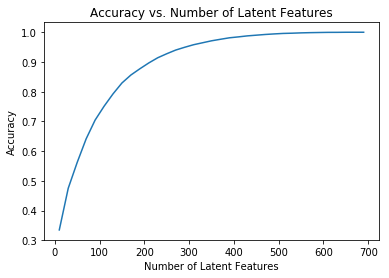

In [362]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df_copy.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [363]:
df_train = df_copy.head(40000)
df_test = df_copy.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    test_idx = user_item_test.index
    test_arts = user_item_test.columns
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [364]:
# Validating the size of train and test matrices
user_item_train.shape, user_item_test.shape

((4487, 714), (682, 574))

In [365]:
# Users we can make prediction for
test_idx.shape

(682,)

In [366]:
# Users with cold start problem
len(test_idx) - len(set(user_item_train.index).intersection(set(test_idx)))

662

In [367]:
# Articles we can make prediction for
test_arts.shape

(574,)

In [368]:
# Articles with cold start problem
len(test_arts) - len(set(user_item_train.columns).intersection(set(test_arts)))

0

In [369]:
# Replace the values in the dictionary below
a = 662
b = 574
c = 20
d = 0

sol_4_dict = {
    'How many users can we make predictions for in the test set?': c , 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a , 
    'How many movies can we make predictions for in the test set?': b ,
    'How many movies in the test set are we not able to make predictions for because of the cold start problem?': d 
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


##### Please note, the last 2 test case in sol_4_test fails and throws error since it tries to check for movies instead of articles. That seems to be a mistake in the test case created and I was bale to confirm that after checking the sol_4_test in project_tests.py. I have changed the above statements to match the test case and get the correct answer.

`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [370]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train, full_matrices=False)
# fit svd similar to above then use the cells below

In [371]:
u_train.shape, s_train.shape, vt_train.shape

((4487, 714), (714,), (714, 714))

In [372]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data

In [373]:
# Get index of the user_id and article_id that exist in test dataset
user_id_index = user_item_train.index.isin(test_idx)
art_id_index = user_item_train.columns.isin(test_arts)

In [374]:
# Create the u and v test matrices
u_test = u_train[user_id_index, :]
vt_test = vt_train[:, art_id_index]

In [375]:
# Validate the size for u and v matrices
u_test.shape, vt_test.shape

((20, 714), (714, 574))

In [376]:
# Create a df with the actual values of test data
user_item_ts_actual = user_item_test.loc[user_item_matrix.loc[user_id_index, : ].index,:]

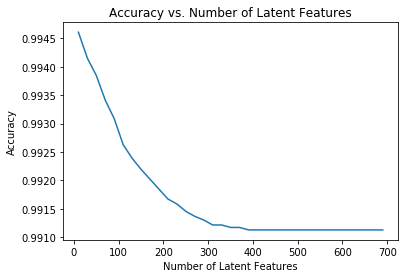

In [377]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs_tr = []
sum_errs_ts = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new_tr, u_new_tr, vt_new_tr = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_new_ts, vt_new_ts = u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_est_tr = np.around(np.dot(np.dot(u_new_tr, s_new_tr), vt_new_tr))
    user_item_est_ts = np.around(np.dot(np.dot(u_new_ts, s_new_tr), vt_new_ts))
    
    # compute error for each prediction to actual value
    diffs_tr = np.subtract(user_item_train, user_item_est_tr)
    diffs_ts = np.subtract(user_item_ts_actual, user_item_est_ts)
    
    # total errors and keep track of them for train data
    err_tr = np.sum(np.sum(np.abs(diffs_tr)))
    sum_errs_tr.append(err_tr)
    
    # total errors and keep track of them for test data
    err_ts = np.sum(np.sum(np.abs(diffs_ts)))
    sum_errs_ts.append(err_ts)

# plot error for test data
plt.plot(num_latent_feats, 1 - np.array(sum_errs_ts)/df_copy.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

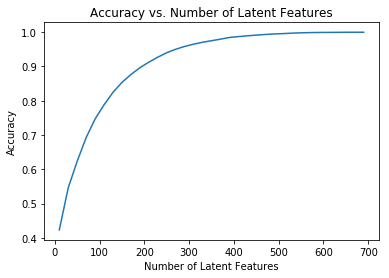

In [378]:
# plot error for train data
plt.plot(num_latent_feats, 1 - np.array(sum_errs_tr)/df_copy.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

#### Accuracy for the test data set decreases as the number of latest feature increases. On the other hand, accuracy increases with an increase in latent features when tested for the train data. This concludes that the model is overfitting and that it has learnt too much patterns from the training data to make it incapable to work well on unseen data with high accuracy.
#### In general, Collaborative filtering and Matrix Factroization recommendation systems work better with users having some prior history of choices or interactions which can be used to identify patterns for them and hence predict better in future. For cases like this, where we have only 20 users with prior article interactions, these mthods may not work best. Majority of the users here have a  so called cold-start problem where users have no prior history. In such cases, it is best suggested to either use Rank or Knowledge based recommendations. Over the time, as we collect more data for users and his interactions and choices, more personalized recommendation systems like Collaboative Filtering, Content based, SDV can be used.
#### Given the situation, A/B testing can be used to test how users are reacting to our recommendations. One group can be shown the recommendations from the system while the other group doesn't get these recommendations. Based on the click and selection (hit-rate) users make, we can compare our key metrics to find if the result is statistically significant. Based on the result we can conclude how well our recommendation system is working.

In [382]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])

0